Course Structure

As this course covers a broad range of ways that data visualizations can be used in the data analysis process, there will also be a large number of topics that will be touched upon. Below is a summary of topics that will be covered in the remaining lessons in this course.
Lesson 2: Design of Visualizations

Before getting into the actual creation of visualizations later in the course, this lesson introduces design principles that will be useful both in exploratory and explanatory analysis. You will learn about different data types and ways of encoding data. You will also learn about properties of visualizations that can impact both the clarity of messaging as well as their accuracy.
Lessons 3-5: Exploration of Data

These lessons systematically present core visualizations in exploratory data analysis. Exploration starts with univariate visualizations to identify trends in distribution and outliers in single variables. Bivariate visualizations follow, to show relationships between variables in the data. Finally, multivariate visualization techniques are presented to identify complex relationships between three or more variables at the same time.
Lesson 6: Explanatory Visualizations

This lesson describes considerations that should be made when moving from exploratory data analysis to explanatory analysis. When polishing visualizations to present to others, you will need to consider what findings you want to focus on and how to use visualization techniques to highlight your main story. This lesson also provides tips for presentation of results and how to iterate on your presentations.
Lesson 7: Visualization Case Study

In this lesson, you will bring together everything from the previous lessons in an example case study. You will be presented with a dataset and perform an exploratory analysis. You will then take findings from that analysis and polish them up for presentation as explanatory visualizations.
Lesson 8: (Optional) Supplemental Topics

In this optional lesson, you can learn about topics that don’t quite fit into the rest of the course. Here, you can read about alternative Python plotting libraries and visualization types. In particular, you may be interested in this lesson if you want to generate plots based on maps.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

additional plugins to improve the plots

In [ ]:
install.packages('ggplot2')
library(ggplot2)

df = read.csv(file.choose()) #select your dataset 
df2 = head(df, 30)


qplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score', 
      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College')

qplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score', 
      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College', 
      color = as.factor(df2$Public..1...Private..2.))

qplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score',
      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College',
      shape = as.factor(df2$Public..1...Private..2.), color = df2$stud..fac..ratio)

ggplot(df2, aes(x=Math.SAT, y=Verbal.SAT, group=stud..fac..ratio)) +
  geom_point(aes(shape=stud..fac..ratio, color=as.factor(df2$Public..1...Private..2.))

Univariate Visualizations

Bar Chart

using seaborn's countplot, which is a bar chart

In [ ]:
sb.countplot(data = df, x = 'cat_var')

because the color palette is too varied, we are setting a base color so viewers won't get distracted

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color)

we now order the bars by the count, so the plot will display the most to the fewest

In [ ]:
base_color = sb.color_palette()[0]
cat_order = df['cat_var'].value_counts().index
sb.countplot(data = df, x = 'cat_var', color = base_color, order = cat_order)

In [ ]:
# this method requires pandas v0.21 or later
level_order = ['Alpha', 'Beta', 'Gamma', 'Delta']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['cat_var'] = df['cat_var'].astype(ordered_cat)

# # use this method if you have pandas v0.20.3 or earlier
# df['cat_var'] = df['cat_var'].astype('category', ordered = True,
#                                      categories = level_order)

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color)

In [ ]:
sb.countplot(data_var)

using seaborn, we can simply set y to the column and the bar will become horizontal

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'cat_var', color = base_color)

we can rotate the label 90 degress clockwise so that the labels are legible

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color)
plt.xticks(rotation = 90)

Absolute vs. Relative Frequency

plotting relative counts by finding out the max relative frequency, then configure the plot area size

In [ ]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = df.shape[0]
max_count = df['cat_var'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

with annotations on each bar

In [ ]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['cat_var'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')

Count NaNs

In [ ]:
df.isna().sum()

In [ ]:
na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)

Bar Chart Practice

In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular workspace, you'll practice creating single-variable plots for categorical data.

In [ ]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# solution script imports
from solutions_univ import bar_chart_solution_1, bar_chart_solution_2

In this workspace, you'll be working with this dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in [this GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [ ]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

**Task 1**: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

In [ ]:
# YOUR CODE HERE
sb.countplot(data = pokemon, x = 'generation_id', color = sb.color_palette()[0])

In [ ]:
#Answer:
def bar_chart_solution_1():
    """
    Solution for Question 1 in bar chart practice: create a bar chart of
    Pokemon species introduced by generation.
    """
    sol_string = ["I used seaborn's countplot function to generate this chart.",
                  "I also added an additional argument so that each bar has the same color."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('./data/pokemon.csv')

    base_color = sb.color_palette()[0]
    sb.countplot(data = pokemon, x = 'generation_id', color = base_color)

Once you've created your chart, run the cell below to check the output from our solution. Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.

In [ ]:
bar_chart_solution_1()

**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [ ]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

In [ ]:
# YOUR CODE HERE
n_points = pkmn_types.shape[0]
max_count = pkmn_types['type'].value_counts().max()
max_prop = max_count / n_points

tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = pkmn_types, x = 'type', color = sb.color_palette()[0])
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xticks(rotation = 90)

In [ ]:
#answer
def bar_chart_solution_2():
    """
    Solution for Question 2 in bar chart practice: create a sorted bar chart of
    relative type frequencies.
    """
    sol_string = ["I created a horizontal bar chart since there are a lot of",
                  "Pokemon types. The unique() method was used to get the",
                  "number of different Pokemon species. I also added an xlabel",
                  "call to make sure it was clear the bar length represents",
                  "a relative frequency."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('./data/pokemon.csv')
    pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()

    # get order of bars by frequency
    type_counts = pkmn_types['type'].value_counts()
    type_order = type_counts.index

    # compute largest proportion
    n_pokemon = pkmn_types['species'].unique().shape[0]
    max_type_count = type_counts[0]
    max_prop = max_type_count / n_pokemon

    # establish tick locations and create plot
    base_color = sb.color_palette()[0]
    tick_props = np.arange(0, max_prop, 0.02)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    base_color = sb.color_palette()[0]
    sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
    plt.xticks(tick_props * n_pokemon, tick_names)
    plt.xlabel('proportion')

In [ ]:
bar_chart_solution_2()

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solutions_univ.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!

Pie Charts

Unfortunately, pie charts are a fairly limited plot type in the range of scenarios where they can be used, and it is easy for chart makers to try and spice up pie charts in a way that makes them more difficult to read. If you want to use a pie chart, try to follow certain guidelines:

    Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
    Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
    Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.


In [ ]:
# code for the pie chart seen above
sorted_counts = df['cat_var'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')

Doughnut Chart

In [ ]:
sorted_counts = df['cat_var'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

Histogram

In [ ]:
plt.hist(data = df, x = 'num_var') #default is 10 bins, and tick marks/bin boundaries is difficult to interpret

In [ ]:
bin_size = 1
bin_edges = np.arange(0, df['num_var'].max()+bin_size, bin_size) #note that we want to include the max, so + bin_size
plt.hist(data = df, x = 'num_var', bins = bin_edges)

In [ ]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['num_var'].max()+4, 4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['num_var'].max()+1/4, 1/4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)

using Seaborn

In [ ]:
sb.distplot(df['num_var']) #num bins larger than matplotlib, and probability density curve estimate of the distribution is drawn
#use kde = False and no probability density distribution

In [ ]:
bin_edges = np.arange(0, df['num_var'].max()+1, 1)
sb.distplot(df['num_var'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})

Histogram Practice

In [ ]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_univ import histogram_solution_1

We'll continue working with the Pokémon dataset in this workspace.

In [ ]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

**Task**: Pokémon have a number of different statistics that describe their combat capabilities. Here, create a _histogram_ that depicts the distribution of 'special-defense' values taken. **Hint**: Try playing around with different bin width sizes to see what best depicts the data.

In [ ]:
# YOUR CODE HERE
bin_size = 5
bin_edges = np.arange(0, pokemon['special-defense'].max() + bin_size, bin_size)
plt.hist(pokemon['special-defense'], bins = bin_edges)

In [ ]:
# run this cell to check your work against ours
histogram_solution_1()

More on bin edges

In [ ]:
plt.figure(figsize = [10, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))

In [ ]:
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1))

Zooming in

In [ ]:
plt.figure(figsize = [10, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df['skew_var'].max() + 2.5, 2.5)
plt.hist(data = df, x = 'skew_var', bins = bin_edges)

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, 35 + 1, 1)
plt.hist(data = df, x = 'skew_var', bins = bin_edges)
plt.xlim(0, 35) # could also be called as plt.xlim((0, 35))

Scales and Transformations

In [ ]:
plt.figure(figsize = [10, 5])

# histogram on left: natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, ln_data.max()+100, 100)
plt.hist(ln_data, bins = bin_edges)

# histogram on right: directly log-transform data
plt.subplot(1, 2, 2)
log_ln_data = np.log10(ln_data)
log_bin_edges = np.arange(0.8, log_ln_data.max()+0.1, 0.1)
plt.hist(log_ln_data, bins = log_bin_edges)
plt.xlabel('log(values)') # add axis label for clarity

Using .xscale (transformation by matplotlib)

In [ ]:
bin_edges = np.arange(0, ln_data.max()+100, 100)
plt.hist(ln_data, bins = bin_edges)
plt.xscale('log')

Need to have bin ranges that make sense. and the ticks also need to be redefined

In [ ]:
bin_edges = 10 ** np.arange(0.8, np.log10(ln_data.max())+0.1, 0.1)
plt.hist(ln_data, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)

There are some limitations to log transformations (things need to be positive), so we can use some other functions, or define our own functions.

In [ ]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

bin_edges = np.arange(0, sqrt_trans(ln_data.max())+1, 1)
plt.hist(ln_data.apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(ln_data.max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))

Scales and Transformations Practice

In [ ]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_univ import scales_solution_1, scales_solution_2

Once again, we make use of the Pokémon data for this exercise.

In [ ]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

**Task 1**: There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

In [ ]:
# YOUR CODE HERE
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins)
#plt.xscale('log')
plt.xlim((0,6))

In [ ]:
#answer
def scales_solution_1():
    """
    Solution for Question 1 in scales and transformation practice: create a
    histogram of Pokemon heights.
    """
    sol_string = ["There's a very long tail of Pokemon heights. Here, I've",
                  "focused in on Pokemon of height 6 meters or less, so that I",
                  "can use a smaller bin size to get a more detailed look at",
                  "the main data distribution."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('./data/pokemon.csv')

    bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
    plt.hist(data = pokemon, x = 'height', bins = bins)
    plt.xlim((0,6))

In [ ]:
# run this cell to check your work against ours
scales_solution_1()

**Task 2**: In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

In [ ]:
# YOUR CODE HERE

In [ ]:
# run this cell to check your work against ours
scales_solution_2()

In [ ]:
#answer
def scales_solution_2():
    """
    Solution for Question 2 in scales and transformation practice: create a
    histogram of Pokemon weights.
    """
    sol_string = ["Since Pokemon weights are so skewed, I used a log transformation",
                  "on the x-axis. Bin edges are in increments of 0.1 powers of ten,",
                  "with custom tick marks to demonstrate the log scaling."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('./data/pokemon.csv')

    bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
    ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    labels = ['{}'.format(val) for val in ticks]

    plt.hist(data = pokemon, x = 'weight', bins = bins)
    plt.xscale('log')
    plt.xticks(ticks, labels)
    plt.xlabel('Weight (kg)')

Some aside for KDE

c:\users\inves\appdata\local\programs\python\python35\lib\site-packages\seaborn\distributions.py:276: UserWarning: Kernel other than `gau` requires statsmodels.
  warnings.warn(msg, UserWarning)


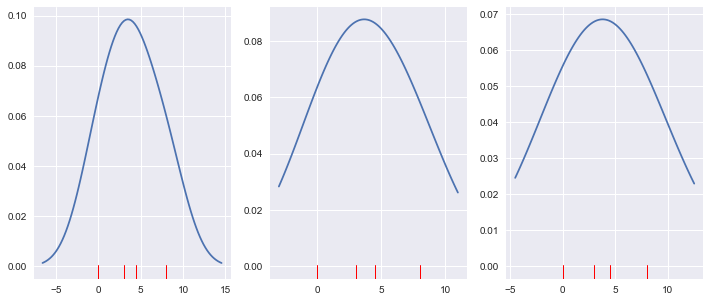

In [6]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})